In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import fiona
from shapely.geometry import Point
import geopandas as gpd 

In [2]:
# import data
data_path = '../data/'
result_path = '../results/'
plots_path = '../plots/'
cases_filename = 'cases_train.csv'
location_filename = 'location.csv'
cases_processed_filename = 'cases_train_processed.csv'

cases = pd.read_csv(data_path+cases_filename)
location = pd.read_csv(data_path+location_filename)
date_parser = lambda date : pd.to_datetime(date, format='%d.%m.%Y', errors='ignore')
cases_processed = pd.read_csv(result_path+cases_processed_filename, parse_dates=['date_confirmation'], date_parser=date_parser)

## Statistics

In [3]:
print('\t\tStatistics for numerical columns in raw (cases_train) dataset')
for col in ['latitude', 'longitude']:
  print(f"Column name: {col}")
  print(f"\tMin: {cases[col].min()}")
  print(f"\tMax: {cases[col].max()}")
  print(f"\tMean: {cases[col].mean()}")
  print(f"\tMedian: {cases[col].median()}")
  print(f"\tStandard Deviation: {cases[col].std()}")

		Statistics for numerical columns in raw (cases_train) dataset
Column name: latitude
	Min: -54.808029999999974
	Max: 70.0718
	Mean: 18.38855498463511
	Median: 19.03681000000006
	Standard Deviation: 19.592051219540142
Column name: longitude
	Min: -159.72759647299998
	Max: 174.74
	Mean: 31.891515660925723
	Median: 72.83483000000007
	Standard Deviation: 66.14336325551595


In [4]:
print('\t\tStatistics for numerical columns in location dataset')
for col in location.columns:
  if pd.api.types.is_numeric_dtype(location[col]):
    print(f"Column name: {col}")
    print(f"\tMin: {location[col].min()}")
    print(f"\tMax: {location[col].max()}")
    print(f"\tMean: {location[col].mean()}")
    print(f"\tMedian: {location[col].median()}")
    print(f"\tStandard Deviation: {location[col].std()}")

		Statistics for numerical columns in location dataset
Column name: Lat
	Min: -52.368
	Max: 71.7069
	Mean: 35.98792394114094
	Median: 37.938283945
	Standard Deviation: 12.872793301219074
Column name: Long_
	Min: -174.1596
	Max: 178.065
	Mean: -72.33704631058106
	Median: -86.87843835000001
	Standard Deviation: 53.019022015810364
Column name: Confirmed
	Min: 0
	Max: 1167496
	Mean: 7760.495953464846
	Median: 498.5
	Standard Deviation: 41840.357516319775
Column name: Deaths
	Min: 0
	Max: 37076
	Mean: 241.7407688416793
	Median: 9.0
	Standard Deviation: 1476.661532607982
Column name: Recovered
	Min: 0
	Max: 2577446
	Mean: 5291.398330804249
	Median: 0.0
	Standard Deviation: 53152.86865909997
Column name: Active
	Min: -2577446.0
	Max: 337913.0
	Mean: 2228.632085020243
	Median: 421.0
	Standard Deviation: 44406.9256659676
Column name: Incidence_Rate
	Min: 0.0
	Max: 14871.183643531675
	Mean: 1538.5728130143032
	Median: 1204.3511787397847
	Standard Deviation: 1368.4573323660932
Column name: Case-F

In [5]:
print('  Statistics for selected numerical columns in preprocessed (cases_train_processed) dataset')
for col in ['age', 'date_confirmation', 'latitude', 'longitude']:
  print(f"Column name: {col}")
  print(f"\tMin: {cases_processed[col].min()}")
  print(f"\tMax: {cases_processed[col].max()}")
  print(f"\tMean: {cases_processed[col].mean()}")
  if col == 'date_confirmation':
    dates = cases_processed[~cases_processed[col].isna()][col]
    print(f"\tMedian: {pd.Timestamp(dates.astype('int64').median())}")
  else:
    print(f"\tMedian: {cases_processed[col].median()}")
    print(f"\tStandard Deviation: {cases_processed[col].std()}")

  Statistics for selected numerical columns in preprocessed (cases_train_processed) dataset
Column name: age
	Min: 0
	Max: 106
	Mean: 43.418669111126825
	Median: 43.0
	Standard Deviation: 13.370576894630796
Column name: date_confirmation
	Min: 2020-01-06 00:00:00
	Max: 2020-06-16 00:00:00
	Mean: 2020-05-08 04:57:07.167699200
	Median: 2020-05-15 00:00:00
Column name: latitude
	Min: -54.808029999999974
	Max: 70.0718
	Mean: 18.388554984635103
	Median: 19.03681000000006
	Standard Deviation: 19.592051219540146
Column name: longitude
	Min: -159.72759647299998
	Max: 174.74
	Mean: 31.89151566092574
	Median: 72.83483000000007
	Standard Deviation: 66.14336325551595


## Visualization of raw data

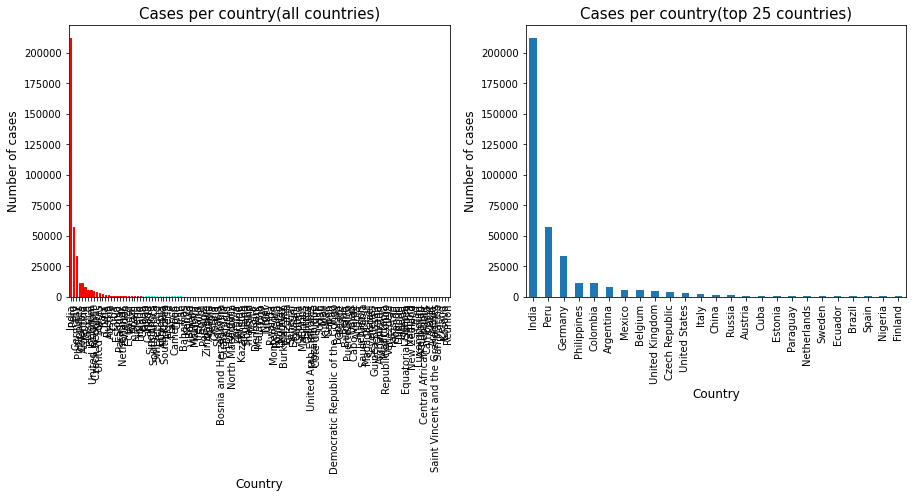

In [6]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = cases['country'].value_counts().plot(kind='bar', color = 'cyan')
for p in ax.patches[:25]:
  p.set_color('red')
plt.title("Cases per country(all countries)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Country", fontsize = 12)
plt.subplot(1, 2, 2)
cases['country'].value_counts()[:25].plot(kind='bar')
plt.title("Cases per country(top 25 countries)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Country", fontsize = 12)
plt.savefig(plots_path + 'plot1.png', transparent=True, bbox_inches = "tight")
plt.show()

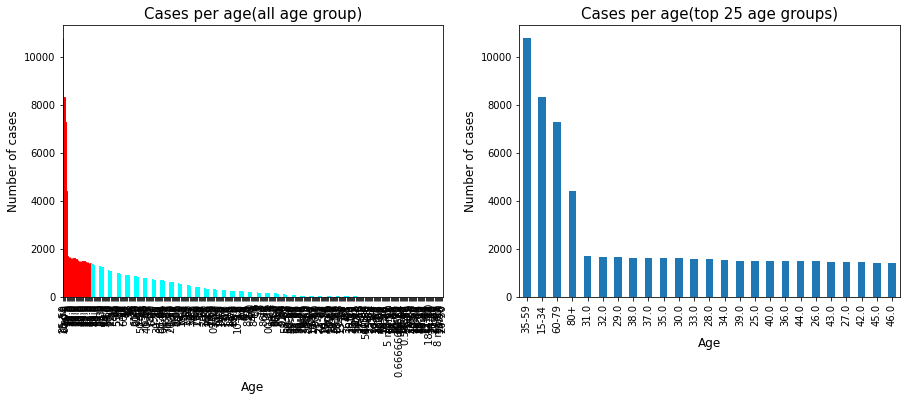

In [7]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = cases['age'].value_counts().plot(kind='bar', color = 'cyan')
for p in ax.patches[:25]:
  p.set_color('red')
plt.title("Cases per age(all age group)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Age", fontsize = 12)
plt.subplot(1, 2, 2)
cases['age'].value_counts()[:25].plot(kind='bar')
plt.title("Cases per age(top 25 age groups)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Age", fontsize = 12)
plt.savefig(plots_path + 'plot2.png', transparent=True, bbox_inches = "tight")
plt.show()

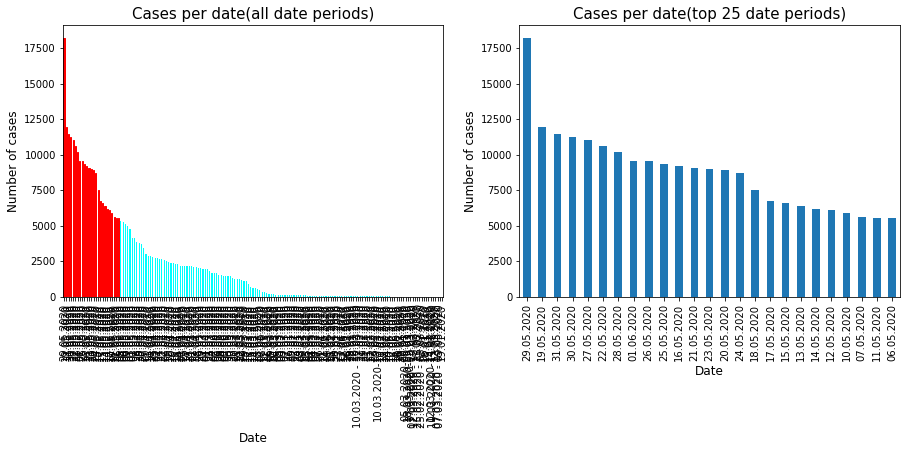

In [8]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = cases['date_confirmation'].value_counts().plot(kind='bar', color = 'cyan')
for p in ax.patches[:25]:
  p.set_color('red')
plt.title("Cases per date(all date periods)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Date", fontsize = 12)
plt.subplot(1, 2, 2)
x = cases['date_confirmation'].value_counts()[:25].plot(kind='bar')
plt.title("Cases per date(top 25 date periods)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Date", fontsize = 12)
plt.savefig(plots_path + 'plot3.png', transparent=True, bbox_inches = "tight")
plt.show()

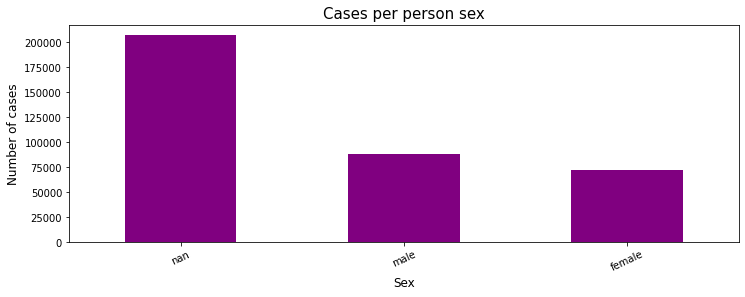

In [9]:
plt.figure(figsize = (12, 4))
ax = cases['sex'].value_counts(dropna=False).plot(kind='bar', color = 'purple')
plt.title("Cases per person sex", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Sex", fontsize = 12)
plt.xticks(rotation = 25)
plt.savefig(plots_path + 'plot4.png', transparent=True, bbox_inches = "tight")
plt.show()

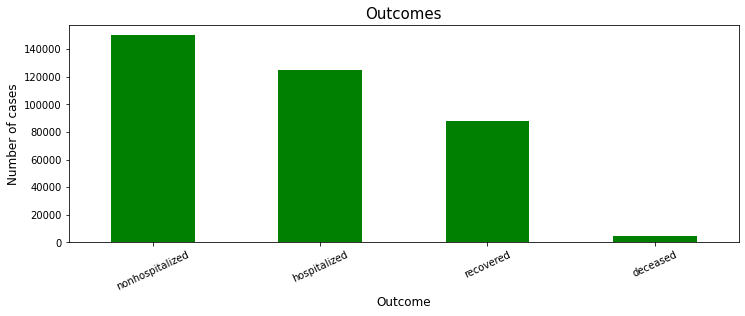

In [10]:
plt.figure(figsize = (12, 4))
ax = cases['outcome'].value_counts(dropna=False).plot(kind='bar', color = 'green')
plt.title("Outcomes", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Outcome", fontsize = 12)
plt.xticks(rotation = 25)
plt.savefig(plots_path + 'plot5.png', transparent=True, bbox_inches = "tight")
plt.show()

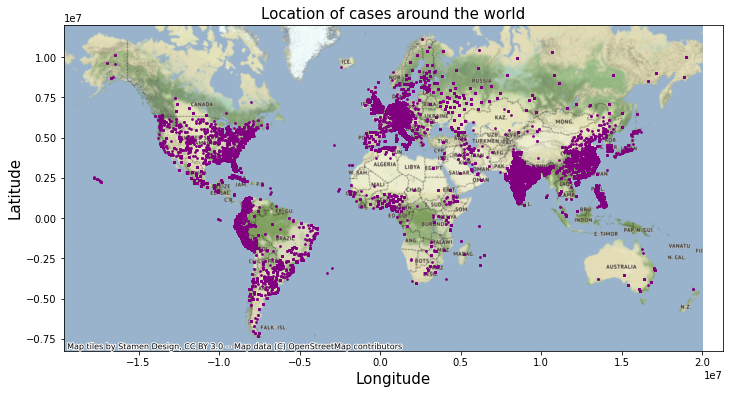

In [11]:
# MAKE SURE THAT GEOPANDAS IS PROPERLY INSTALLED ON YOUR COMPUTER
loc_func = [Point(xy) for xy in zip(cases['longitude'], cases['latitude'])]
geodata = gpd.GeoDataFrame(cases, geometry=loc_func)
geodata.set_crs(epsg=4326, inplace=True)
geodata = geodata.to_crs(epsg=3857)
ax = geodata.plot(figsize=(12, 6), markersize=3, color='purple')
ctx.add_basemap(ax, crs=geodata.crs.to_string())
ax.tick_params(labelbottom=True)
ax.set_xlabel("Longitude", fontsize = 15)
ax.set_ylabel("Latitude", fontsize = 15)
plt.title("Location of cases around the world", fontsize = 15)

plt.savefig(plots_path + 'plot6.png', transparent=True)
plt.show()

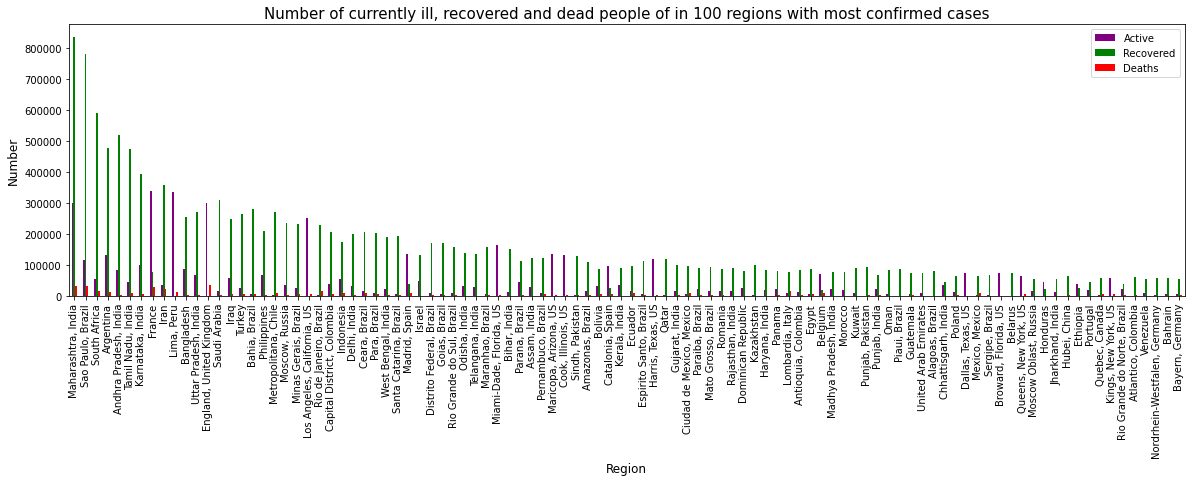

In [12]:
location = location.sort_values(by = 'Confirmed', ascending = False)
ax = location[:100].plot(x="Combined_Key", y=['Active', 'Recovered', 'Deaths'], kind="bar", figsize = (20, 5), color = ['purple', 'g', 'r'])
plt.title("Number of currently ill, recovered and dead people of in 100 regions with most confirmed cases", fontsize = 15)
plt.ylabel("Number", fontsize = 12)
plt.xlabel("Region", fontsize = 12)
plt.savefig(plots_path + 'plot7.png', transparent=True, bbox_inches = "tight")

plt.show()

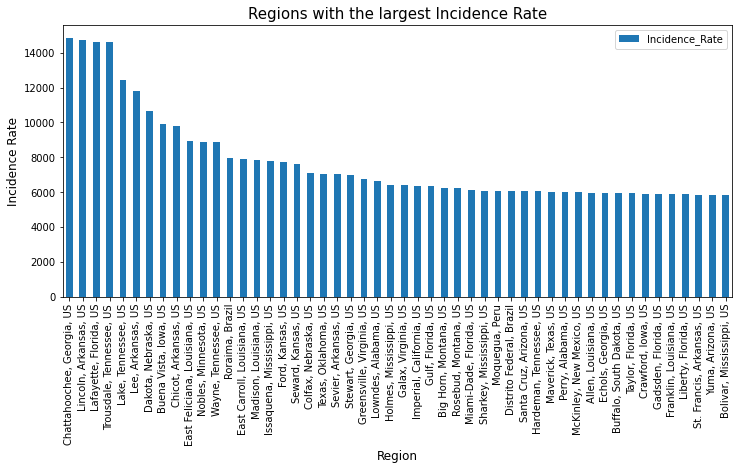

In [13]:
location = location.sort_values(by = 'Incidence_Rate', ascending = False)
location.head(50).plot(x="Combined_Key", y='Incidence_Rate', kind="bar", figsize = (12, 5))
plt.title("Regions with the largest Incidence Rate", fontsize = 15)
plt.ylabel("Incidence Rate", fontsize = 12)
plt.xlabel("Region", fontsize = 12)
plt.savefig(plots_path + 'plot8.png', transparent=True, bbox_inches = "tight")
plt.show()

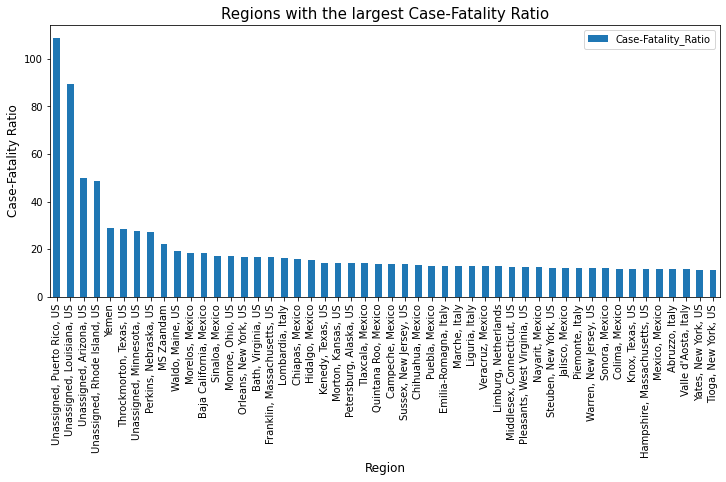

In [14]:
location = location.sort_values(by = 'Case-Fatality_Ratio', ascending = False)
location.head(50).plot(x="Combined_Key", y='Case-Fatality_Ratio', kind="bar", figsize = (12, 5))
plt.title("Regions with the largest Case-Fatality Ratio", fontsize = 15)
plt.ylabel("Case-Fatality Ratio", fontsize = 12)
plt.xlabel("Region", fontsize = 12)
plt.savefig(plots_path + 'plot9.png', transparent=True, bbox_inches = "tight")
plt.show()

## Visualization of processed data

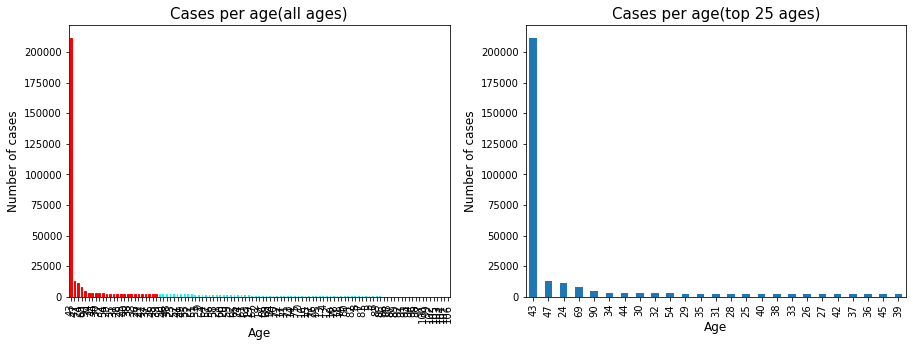

In [15]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = cases_processed['age'].value_counts().plot(kind='bar', color = 'cyan')
for p in ax.patches[:25]:
  p.set_color('red')
plt.title("Cases per age(all ages)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Age", fontsize = 12)
plt.subplot(1, 2, 2)
cases_processed['age'].value_counts()[:25].plot(kind='bar')
plt.title("Cases per age(top 25 ages)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Age", fontsize = 12)
plt.savefig(plots_path + 'plot10.png', transparent=True, bbox_inches = "tight")
plt.show()

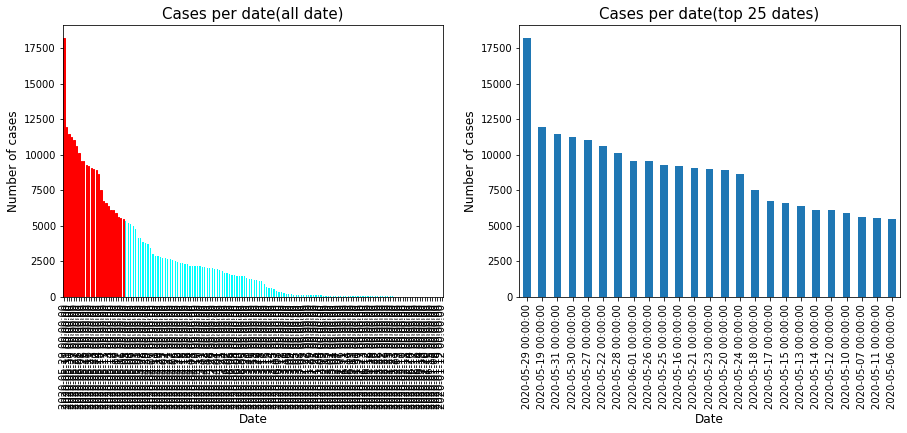

In [16]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
ax = cases_processed['date_confirmation'].value_counts().plot(kind='bar', color = 'cyan')
for p in ax.patches[:25]:
  p.set_color('red')
plt.title("Cases per date(all date)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Date", fontsize = 12)
plt.subplot(1, 2, 2)
cases_processed['date_confirmation'].value_counts()[:25].plot(kind='bar')
plt.title("Cases per date(top 25 dates)", fontsize = 15)
plt.ylabel("Number of cases", fontsize = 12)
plt.xlabel("Date", fontsize = 12)
plt.savefig(plots_path + 'plot11.png', transparent=True, bbox_inches = "tight")
plt.show()

## Missing values

In [17]:
print('\t\t\tMissing values in cases_train dataset')
for column in cases.columns:
  print(f"Column {column} has {cases[column].isna().sum()} missing values")

			Missing values in cases_train dataset
Column age has 209265 missing values
Column sex has 207084 missing values
Column province has 4106 missing values
Column country has 18 missing values
Column latitude has 2 missing values
Column longitude has 2 missing values
Column date_confirmation has 288 missing values
Column additional_information has 344912 missing values
Column source has 128478 missing values
Column outcome has 0 missing values
Column geometry has 0 missing values


In [18]:
print('\t\t\tMissing values in location dataset')
for column in location.columns:
  print(f"Column {column} has {location[column].isna().sum()} missing values")

			Missing values in location dataset
Column Province_State has 168 missing values
Column Country_Region has 0 missing values
Column Last_Update has 0 missing values
Column Lat has 80 missing values
Column Long_ has 80 missing values
Column Confirmed has 0 missing values
Column Deaths has 0 missing values
Column Recovered has 0 missing values
Column Active has 2 missing values
Column Combined_Key has 0 missing values
Column Incidence_Rate has 80 missing values
Column Case-Fatality_Ratio has 48 missing values
